# Problem Set 1: Econ622
## Pablo Valenzuela C.
### 09-17-2020


In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/pvalenzuelac/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using LinearAlgebra, Statistics, Plots, Distributions



### 1) Exercise 7 Introductory Examples
Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state).  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal.  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $.  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

In [3]:
function random_walk(t_max; x0=1.0, α = 1.0, σ = 0.2)
    ϵ = randn(t_max)
    x = zeros(t_max+1)
    # the random walk
    x[1] = x0
    x[end] = 0
    for i = 2:(t_max)
        x[i] = α*x[i-1] +σ*ϵ[i]
    end
    return(x=x)
end


random_walk (generic function with 1 method)

In [4]:
function first_passage(a, x)
    for i = 1:length(x)
        if x[i]<=a
            return(iter=i)
        end
    end
end

first_passage (generic function with 1 method)

Float64

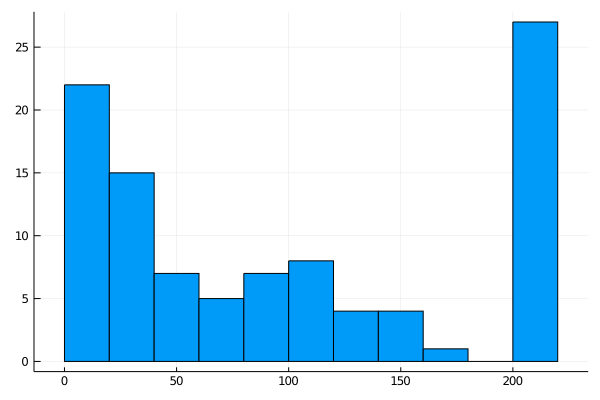

In [5]:
# storing the results of 1
n = 100
t_max = 200

res = zeros( n)
display(typeof(res[5]))
for i = 1:n
    res[i] = first_passage(0, random_walk(t_max))
end
histogram(res, legend=false, label="First Passage", bins=:sqrt)

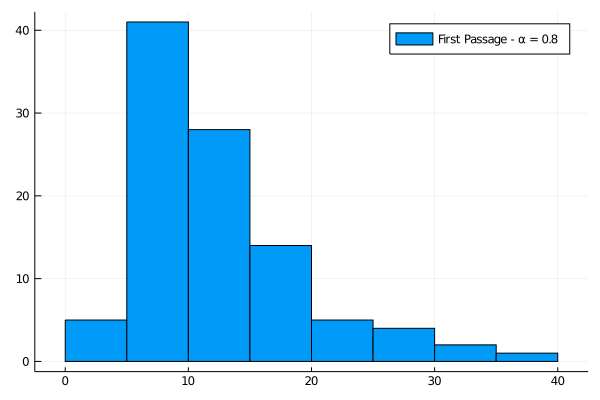

In [6]:
res = zeros(n)

for i = 1:n
    res[i] = first_passage(0, random_walk(t_max, α=0.8))
end
histogram(res, legend=true, label="First Passage - α = 0.8", bins=:sqrt)

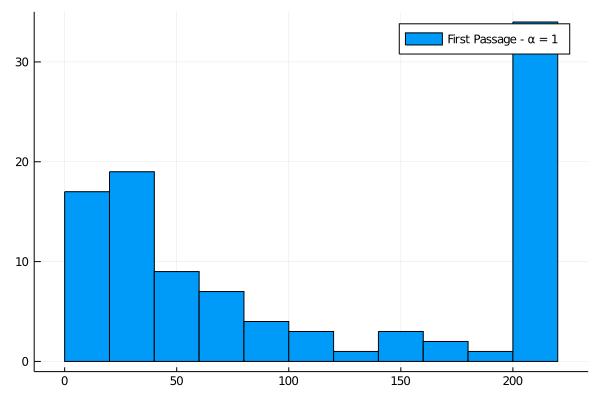

In [7]:
res = zeros(n)

for i = 1:n
    res[i] = first_passage(0, random_walk(t_max, α=1))
end
histogram(res, legend=true, label="First Passage - α = 1", bins=:sqrt)


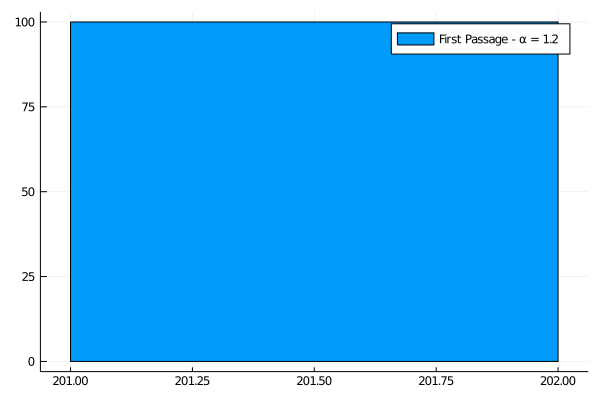

In [8]:
res = zeros(n)

for i = 1:n
    res[i] = first_passage(0, random_walk(t_max, α=1.2))
end
histogram(res, legend=true, label="First Passage - α = 1.2", bins=:sqrt)

### 2) Exercise 8a Introductory Examples

This exercise is more challenging.

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $.

One solution method to find local roots of smooth functions is called Newton’s method.

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`.  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative.  

In [9]:
function fixedpointmap(f, f_prime; iv=0.8, tolerance=1.0E-7, maxiter=1000)
    v_old = iv
    normdiff = Inf
    iter=1
    
    while (normdiff>tolerance)&&(iter<maxiter)
        v_new = v_old - (f(v_old)/f_prime(v_old))
        normdiff = norm(v_new - v_old)
        
        #replace and continue
        v_old = v_new
        iter = iter +1
    end
    return(value = v_old, normdiff=normdiff, iter=iter)
end
    

fixedpointmap (generic function with 1 method)

In [10]:
#f(x) = (x-1)^3
#f_prime(x) = 3*(x-1)^2

f(x) = (5x-3)^2
f_prime(x) = 10*(5x-3)



v_old, normdiff, iter = fixedpointmap(f, f_prime, iv=0.7)
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")



Fixed point = 0.6000000953674317, and |f(x) - x| = 9.536743161842054e-8 in 21 iterations


### 3) Exercise 8b Introductory Examples
For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation.

In [11]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)


D (generic function with 1 method)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative.  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`.  

In [12]:
function fixedpointmap2(f; iv=0.8, tolerance=1.0E-7, maxiter=1000)
    
    v_old = iv
    normdiff = Inf
    iter=1
    
    D(f) = x -> ForwardDiff.derivative(f, x)
    f_prime = D(f)
    
    while (normdiff>tolerance)&&(iter<maxiter)
        v_new = v_old - (f(v_old)/f_prime(v_old))
        normdiff = norm(v_new - v_old)
        
        #replace and continue
        v_old = v_new
        iter = iter +1
    end
    return(value = v_old, normdiff=normdiff, iter=iter)
end

fixedpointmap2 (generic function with 1 method)

In [13]:
f(x) = (x-1)^3

v_old, normdiff, iter = fixedpointmap2(f, iv=0.3)
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")


Fixed point = 0.9999998575605803, and |f(x) - x| = 7.121970990731086e-8 in 39 iterations


In [14]:
f(x) = sin(x)

v_old, normdiff, iter = fixedpointmap2(f, iv=0.9)
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")



Fixed point = 0.0, and |f(x) - x| = 1.0748848100657071e-18 in 6 iterations


It doesn't work with logarithm. Also, in non-continuous functions.

### 4) Exercise 01 Introductory Examples


In [15]:
function factorial2(n)
   #checking special cases
    if n == 0
       return 1 
    end
    mult = 1
    for i = 1:n 
        fact = mult*i
        mult = fact
    end
    return mult
end

factorial2 (generic function with 1 method)

In [16]:
n = 15
@time factorial2(n) ≈ factorial(n)

  0.023333 seconds (68.38 k allocations: 3.427 MiB)


true

### 4.1) Exercise 02 Introductory Examples


In [17]:
function binomial_rv(n,p)
    if (p>1)| (p<0)
        error("The probability must belong to the [0,1] interval")
    end
    ϵ = rand(n)
    res = ϵ.<=p
    return(res)
end



binomial_rv (generic function with 1 method)

In [18]:
n = 100
p = 0.47
pred_prob = sum(binomial_rv(n, p)) / n

0.42

### 5) Exercise 7 Julia Essentials

##### Exercise 5

The Julia libraries include functions for interpolation and approximation.

Nevertheless, let’s write our own function approximation routine as an exercise.

In particular, write a function `linapprox` that takes as arguments

- A function `f` mapping some interval $ [a, b] $ into $ \mathbb R $.  
- two scalars `a` and `b` providing the limits of this interval.  
- An integer `n` determining the number of grid points.  
- A number `x` satisfying `a ≤ x ≤ b`.  


and returns the [piecewise linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) of `f` at `x`, based on `n` evenly spaced grid points `a = point[1] < point[2] < ... < point[n] = b`.

Aim for clarity, not efficiency.

Hint: use the function `range` to linearly space numbers.

Redo Exercise 5 except

1. Pass in a range instead of the `a, b,` and `n`.  Test with a range such as `nodes = -1.0:0.5:1.0`.  
1. Instead of the `while` used in the solution to Exercise 5, find a better way to efficiently bracket the `x` in the nodes.  


Hints:
* Rather than the signature as `function linapprox(f, a, b, n, x)`, it should be called as `function linapprox(f, nodes, x)`.
* `step(nodes), length(nodes), nodes[1]`, and `nodes[end]` may be useful.
* Type `?÷` into jupyter to explore quotients from Euclidean division for more efficient bracketing.

In [19]:
function linapprox2(f,nodes,x)
    st = step(nodes)
    
    u = 0.0
    v = 0.0
    
    if x< 0 
        u = ÷(x,st)*st - st
        v = ÷(x,st)*st
    else
        u = ÷(x,st)*st  
        v = ÷(x,st)*st + st
    end
    
    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)     
end

linapprox2 (generic function with 1 method)

In [20]:
nodes = -1.0:0.5:1.0

f_ex7(x) = x^2
h_ex7(x) = linapprox2(f_ex7, nodes, x)

h_ex7 (generic function with 1 method)

In [ ]:
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex7.(x_grid)
y = h_ex7.(x_grid)

plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation1")